# Equilibrium in Two Dimensions

#### Written for the Paris Quantitative Economics Workshop (September 2022)
#### Author: [John Stachurski](http://johnstachurski.net/)

In [14]:
import numpy as np
import matplotlib.pyplot as plt

from scipy.optimize import newton, bisect

## The Market



We now consider a market for two related products, good 1 and good 2, with price vector $p = (p_1, p_2)$.

Supply of good $i$ at price $p$ is 

$$ q^s_i (p) = b_i \sqrt{p_i} $$

Demand of good $i$ at price $p$ is

$$ q^d_i (p) = \exp(-a_{i1} p_1) + \exp(-a_{i2} p_2) $$

Here $b_i$ and $a_{ij}$ are parameters.

The excess demand functions are

$$ e_i(p) = q^d_i(p) - q^s_i(p), \qquad i = 1, 2 $$

An equilibrium price vector $p^*$ is one where $e_i(p^*) = 0$.  We set

$$ 
    A = \begin{pmatrix}
            a_{11} & a_{12} \\
            a_{21} & a_{22}
        \end{pmatrix}
    \qquad \text{and} \qquad
    b = \begin{pmatrix}
            b_1 \\
            b_2
        \end{pmatrix}
$$

Our default parameter values will be

In [97]:
A = ((0.9, 0.6),
     (0.5, 1.1))
default_A = np.array(A)
default_b = np.ones(2)

In [98]:
def e(p, A=default_A, b=default_b):
    return np.exp(- A @ p) - b * np.sqrt(p)

In [100]:
e((.1, .1))

array([0.54448021, 0.53591602])

### Exercise 1

Plot the contour lines $e_1(p) = 0$ and $e_2(p) = 0$ for $p$ in $[0, 5] \times [0, 5]$

* Put $p_1$ on the horizonal axis and $p_2$ on the vertical axis.
* Use a legend to label the two curves and be sure to label the axes.  
* Make a rough estimate of the equilibrium price, where demand equals supply.

### Solution

In [91]:
def good1_eq_p2_given_p1(p_1):
    
    def f(p_2):
        return e((p_1, p_2))[0]
    
    return bisect(f, 0, 100)

In [92]:
def good2_eq_p2_given_p1(p_1):
    
    def f(p_2):
        return e((p_1, p_2))[1]
    
    return bisect(f, 0, 100)

In [93]:
good1_eq_p2_given_p1 = np.vectorize(good1_eq_p2_given_p1)
good2_eq_p2_given_p1 = np.vectorize(good2_eq_p2_given_p1)

In [94]:
good1_eq_p2_given_p1(0.001)

TypeError: only size-1 arrays can be converted to Python scalars

In [88]:
good2_eq_p2_given_p1((0.3, 0.4))

array([0.34602289, 0.32669486])

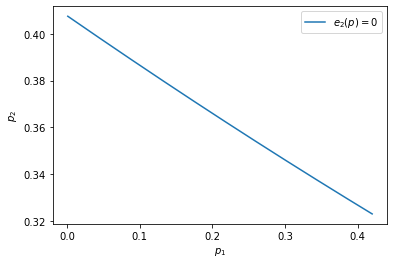

In [87]:
fig, ax = plt.subplots()
p_grid = np.linspace(0.001, 0.42, 200)

#ax.plot(p_grid, good1_eq_p2_given_p1(p_grid), label='$e_1(p)=0$')
ax.plot(p_grid, good2_eq_p2_given_p1(p_grid), label='$e_2(p)=0$')

ax.set_xlabel("$p_1$")
ax.set_ylabel("$p_2$")
ax.legend()
plt.show()

The equilibrium price looks to be about 4.1.

### Exercise 2

Write a function that takes arguments $a, b, c, p$ and returns *excess demand*, which is defined as

$$ e(p) = q_d(p) - q_s(p) $$


### Solution

In [39]:
def excess_demand(p, a=1, b=0.5, c=1):
    return demand(p, a, c) - supply(p, b)

Let's test it:

In [40]:
excess_demand(1.0)

0.8678794411714423

### Exercise 3

Write a class definition that creates a class called `Market` with four methods:

1. An `__init__` method that specifies default parameter values $a=1$, $b=0.5$ and $c=1$.
2. A `demand` method that returns $q_d(p)$ given $p$
3. A `supply` method that returns $q_s(p)$ given $p$
4. An `excess_demand` method that returns $q_d(p) - q_s(p)$ given $p$. 

Using an instance of the class, plot excess demand over the interval from $0.2$ up to $4$.  Also plot a horizontal line at zero.  The equilibrium price is where excess demand crosses zero.

In [41]:
class Market:
    
    def __init__(self, a=1.0, b=0.5, c=1.0):
        self.a, self.b, self.c = a, b, c
        
    def supply(self, p):
        return self.b * np.sqrt(p)
    
    def demand(self, p):
        return self.a * np.exp(-p) + self.c
    
    def excess_demand(self, p):
        return self.demand(p) - self.supply(p)

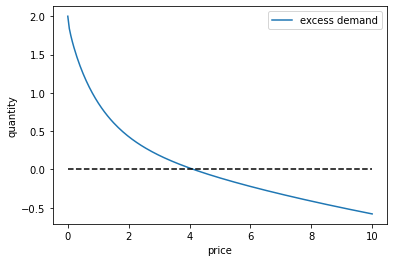

In [42]:
market = Market()

fig, ax = plt.subplots()
p_grid = np.linspace(0, 10, 200)
ax.plot(p_grid, market.excess_demand(p_grid), label='excess demand')
ax.plot(p_grid, np.zeros_like(p_grid), 'k--')
ax.set_xlabel("price")
ax.set_ylabel("quantity")
ax.legend()
plt.show()

### Exercise 4

Write a function that takes an instance of the `Market` class (i.e., an object `market` constructed via `market = Market()`) and returns a market clearing price via Newton's method.

### Solution

In [43]:
def compute_equilibrium(market, price_init=2.0):
    p_star = newton(market.excess_demand, price_init)
    return p_star

In [44]:
market = Market()
compute_equilibrium(market)

4.129732625744951

### Exercise 5

For $b$ in a grid of 200 values between 0.5 and 1.0, plot the equilibrium price for each $b$.

Does the curve that you plotted slope up or down?  Try to provide an explanation for what you see in terms of market equilibrium.

### Solution

In [45]:
b_grid = np.linspace(0.5, 1.0, 200)
prices = np.empty_like(b_grid)
for i, b in enumerate(b_grid):
    market = Market(b=b)
    prices[i] = compute_equilibrium(market)

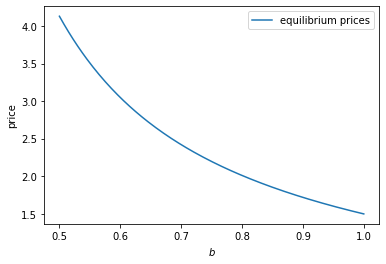

In [46]:
fig, ax = plt.subplots()
ax.plot(b_grid, prices, label="equilibrium prices")
ax.set_xlabel("$b$")
ax.set_ylabel("price")
ax.legend()
plt.show()

The curve slopes down because an increase in $b$ pushes up supply at any given price.  (In other words, the supply curve shifts up.)  

With greater supply, the price tends to fall.